# Notes

Different problems give different number of points: 2, 3 or 4.

Please, fill `STUDENT` variable with your name, so that we call collect the results automatically. Each problem contains specific validation details. We will do our best to review your assignments, but please keep in mind, that for this assignment automatic grade (between $0$ an $1$) is the primary source of ground truth.

In [3]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rcParams["figure.figsize"] = (6,6)

In [5]:
import numpy as np
import torch

In [6]:
STUDENT = "Gal Dahan Evyatar Shpitzer"
ASSIGNMENT = 2
TEST = False

In [7]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 19

# NumPy broadcasting

### 1. Normalize matrix rows (2 points).

For 2-dimensional array `arr`, calculate an array, in which each row is a normalized version of corresponding row from `arr`.

For example, for `(3,4)` input array, the output is also `(3,4)` and `out_arr[0] = (arr[0] - np.mean(arr[0])) / np.std(arr[0])` and so on for other rows.

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array values will be drawn from a normal distribution (`np.random.normal`) with random mean and standard deviation.

In [8]:
def norm_rows(arr):
    # your code goes here
    return (arr - arr.mean(axis=1).T)/(arr.std(axis=1).T)

In [9]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm_rows)

### 2. Normalize matrix columns (2 points).

Similar to Problem 1, but normalization must be performed along columns.

For example, for `(3,4)` input array, the output is also `(3,4)` and `out_arr[:, 0] = (arr[:, 0] - np.mean(arr[:, 0])) / np.std(arr[:, 0])` and so on for other columns.

Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($10 \leq n < 100 $)**. Array values will be drawn from normal distribution (`np.random.normal`) with random mean and standard deviation.

In [10]:
def norm_cols(arr):
    # your code goes here
    return (arr - arr.mean(axis=0).T)/(arr.std(axis=0).T)

In [11]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm_cols)

### 3. Generic normalize routine (2 points).

Similar to Problems 1 and 2, but normalization must be performed according to `axis` argument. `axis=0` means normalization along the columns, and `axis=1` means normalization along the rows.

In [12]:
def norm(arr, axis):
    # your code goes here
    return (arr - arr.mean(axis=axis).T)/(arr.std(axis=axis).T)


In [13]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, norm)

### 4. Dot product of matrix and vector (2 points).

Calculate dot product of 2-dimensional array $M$ of shape $(N,K)$ and 1-dimensional row vector $v$ of shape $(K,)$. You cannot use `np.dot` in this exercise.

Result must be **1-dimensional** of shape $(N,)$, and **will be tested against three random combinations of input arrays dimensions ($10 \leq n < 100 $)**. Arrays values will be drawn from standard normal distribution (`np.random.randn`).

In [14]:
def dot(m, v):
    # your code goes here
    return (m*v).sum(axis=1)

In [ ]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, dot)

### 5. Calculate recurrence matrix (3 points).

In signals (or time series) analysis, it's usualy important to quickly assess the structure (if any) of the data. This can be done in many different ways. You can test, whether a signal is stationary or look at Fourier transform to understand the frequency composition of a signal. When you want to understand, whether signal contains some recurring pattern, it's useful to perform what is called *recurrent quantification analysis*.

Imagine a signal $s_i$. Recurrence matrix is then:

$$
R_{ij} = \left\{
\begin{array}{l}
1, |s_i-s_j|<\varepsilon \\
0, |s_i-s_j|\ge\varepsilon \\
\end{array}
\right.
$$

In this exercise you need to implement a function, which calculates recurrence matrix for 1-dimensional array. The function should not use any loops and must leverage broadcasting. For reference, naive loop implementation is provided below. Plot recurrence matrices for some signals to understand, how signal structure reveals itself in the recurrence matrix.

For example, for a signal of shape $(100,)$ result must be of the shape $(100, 100)$. Result must be **2-dimensional**, and **will be tested against three random combinations of input array dimensions ($100 \leq n < 1000 $)** with different signal patterns (noise, $\sin$, noise + randomly-placed recurrent pattern).

In [15]:
def recm_naive(ts, eps):
    """Loop implementation of recurrent matrix."""

    ln = len(ts)

    rm = np.zeros((ln, ln), dtype=bool)
    
    for i in range(ln):
        for j in range(ln):
            rm[i, j] = np.abs(ts[i]-ts[j])<eps
    return rm

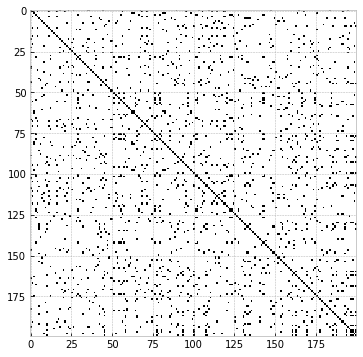

In [25]:
random_signal = np.random.randn(200)
plt.imshow(recm_naive(random_signal, 1e-1), cmap=plt.cm.binary)


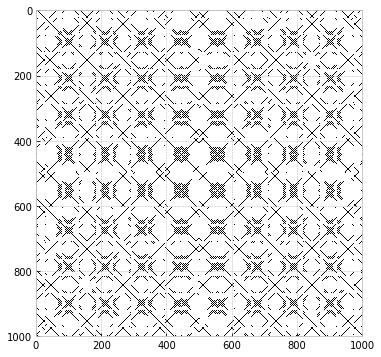

In [21]:
sin_signal = np.sin(np.arange(1000))
plt.imshow(recm_naive(sin_signal, 1e-1), cmap=plt.cm.binary)

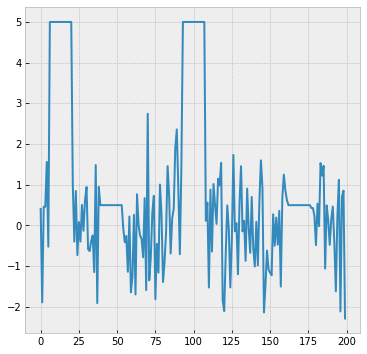

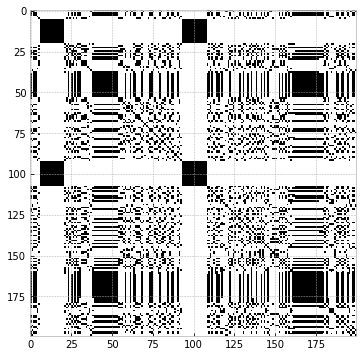

In [23]:
random_signal = np.random.randn(200)
random_signal[6:21] = 5 * np.ones((15,))
random_signal[93:108] = 5 * np.ones((15,))

random_signal[39:54] = 0.5 * np.ones((15,))
random_signal[162:177] = 0.5 * np.ones((15,))

plt.plot(random_signal)
plt.show()

plt.imshow(recm_naive(random_signal, 5e-1), cmap=plt.cm.binary);

In [24]:
def recm(ts, eps):
    rm = np.ones((len(ts), len(ts)), dtype=bool)*ts
    return np.abs(rm - ts.reshape(len(rm) ,1) ) < eps
    
    

In [ ]:
PROBLEM_ID = 5

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, recm)

# PyTorch

### 6. ReLU activation (2 points).

ReLU is the most commonly used activation function in many deep learning application. It's defined as

$$
ReLU(x) = \max(0, x).
$$

Outpu must be of the same shape as input, and **will be tested against three random combinations of input array dimensions ($100 \leq n < 1000 $)**, while values of the input are drawn from standard normal distribution. Number of dimensions of the input will also be selected randomly and is either 1, 2 or 3.

In [ ]:
def relu(arr):
    # your code goes here
    pass

In [ ]:
PROBLEM_ID = 6

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, relu)

### 7. Mean squared error (2 points).

In this problem you need to calculate MSE for a pair of tensors `y_true` and `y_pred`. MSE is defined as usual:

$$
L_{MSE} = \frac{1}{N} \sum_i \left(y_i - \hat y_i\right)^2
$$

Note, however, that `y_true` and `y_pred`may be of **different shape**. While `y_true` is always $(N,)$, `y_pred` may be $(N,1)$, $(1, N)$ or $(N,)$. Input values are drawn from standard normal distribution and **shape is selected randomly ($100 \leq n < 1000 $)**.

In [ ]:
def mse(y_true, y_pred):
    # your code goes here
    pass

In [ ]:
PROBLEM_ID = 7

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, mse)

### 8. Character-level encoding (4 points).

In computations in general and in machine learning specifically letters cannot be used directly, as computers only know aboun numbers. Text data may be encoded in many different ways in natural language processing tasks.

One of the simplest ways to encode letters is to use one-hot encoded representation, with letters being "class labels". A letter is represented by a tensor of shape $(26,)$.

Then, for example, word "python" would be transformed into a tensor of shape $(6, 26)$ with all elements being $0$, except $(0, 15)\sim p,\,(1, 24)\sim y,\,(2, 19)\sim t,...$ being $1$. A phrase would be represented with 3-dimensional tensor.

In this problem you need to create a tensor, which represents a list of words `words` of length $N$. The only characters used are those from `string.ascii_lowercase`, and words are of different length $L_i$. Output must be of shape $(N, \max(L_i), 26)$.

Dimension 0 corresponds to words themselves, with `tensor[0]` being a represetation of `words[0]`. Note, that you need to use padding: although trivial in this case, you must remember, that tensor must accomodate for a longest word, thus dimension 1 is $\max(L_i)$.

Note also, that the only loop you need here is a loop over `words`, there's no need to loop over the resulting tensor.

The result will be tested against three predefined lists of word, with all words being lowercase and containing only ASCII characters.

In [ ]:
def encode(words):
    # your code goes here
    pass

In [ ]:
PROBLEM_ID = 8

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, encode)

# Your grade

In [ ]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")